In [3]:
import pandas as pd

data = {
    'Year': ['2015', '2016', '2017', '2018', '2019'] * 4,
    'Product': ['Product A', 'Product B', 'Product C', 'Product D'] * 5,
    'Sales': [500, 600, 700, 800, 
              550, 650, 720, 850,
              600, 700, 740, 900,
              700, 750, 800, 950,
              750, 800, 850, 1000]
}

df = pd.DataFrame(data)
df.sort_values(by=['Year', 'Sales'], ascending=[True, False], inplace=True)


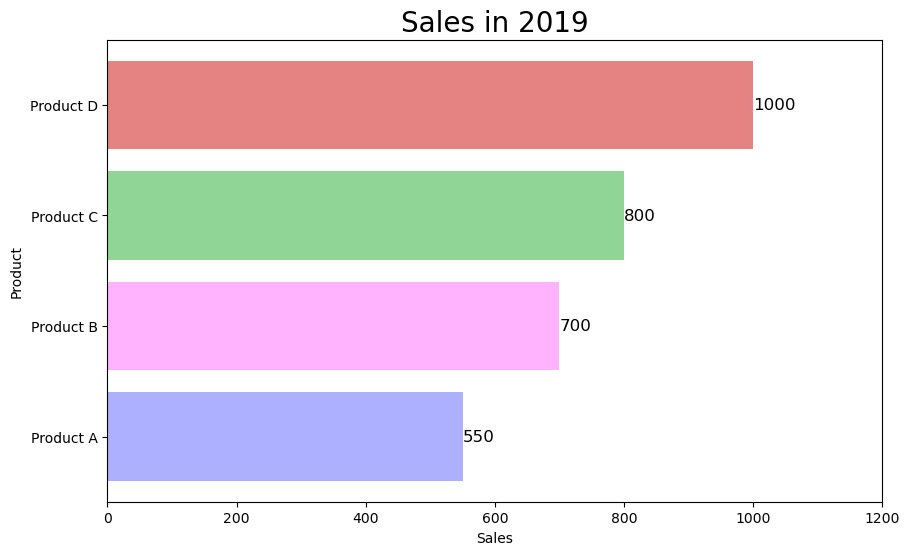

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Sample dataset
data = {
    'Year': ['2015', '2016', '2017', '2018', '2019'] * 4,
    'Product': ['Product A', 'Product B', 'Product C', 'Product D'] * 5,
    'Sales': [500, 600, 700, 800, 
              550, 650, 720, 850,
              600, 700, 740, 900,
              700, 750, 800, 950,
              750, 800, 850, 1000]
}
df = pd.DataFrame(data)
df.sort_values(by=['Year', 'Sales'], ascending=[True, False], inplace=True)

# Pivot data for easy plotting
df_pivot = df.pivot(index='Year', columns='Product', values='Sales')

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

def draw_barchart(year):
    ax.clear()
    y = df_pivot.loc[year].sort_values(ascending=True)
    bars = ax.barh(y.index, y, color=['#adb0ff', '#ffb3ff', '#90d595', '#e48381'])
    ax.set_title(f'Sales in {year}', fontsize=20)
    ax.set_xlim(0, 1200)
    ax.set_xlabel('Sales')
    ax.set_ylabel('Product')
    
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='left', va='center', fontsize=12)

# Set up the animation
years = df_pivot.index
anim = animation.FuncAnimation(fig, draw_barchart, frames=years, interval=1000, repeat=True)

# To display the animation in Jupyter Notebooks
from IPython.display import HTML
HTML(anim.to_jshtml())

# To save the animation as a GIF (if running in a script or non-notebook environment)
# anim.save('bar_race.gif', writer='imagemagick', fps=1)

plt.show()
